In [176]:


import streamlit as st
from IPython.core.display import display, HTML


'''
# LexAI Website !!!
It's beautiful
'''


# API QUERIES
query = st.text_input("Search for a topic", 'agriculture')

import requests

#indices=['eurlex', 'consultations', 'twitter_query', 'twitter_press', 'twitter_politicians'])


## TWITTER
#lexai_twitter_url = "http://127.0.0.1:8000/predict"
#tweet_params=dict(keyword=query)
#tweet_likes = requests.get(lexai_twitter_url,params=tweet_params).json()

'''
## Twitter says nothing
'''
print(st.write('Tweets about this topic were liked by', 'people on Twitter'))

## Dashboard Style



## EURLEX
'''
## REGULATIONS
'''
lexai_eurlex_url = "http://127.0.0.1:8000/query"
tweet_params=dict(query=query,n=5)
eurlex = requests.get(lexai_eurlex_url,params=tweet_params).json()
for i in eurlex:
    st.write(eurlex[str(i)]['title'])
    st.write(eurlex[i]['author'])
    st.write(eurlex[i]['date'])
    st.write(eurlex[i]['link'])


None


In [33]:
eurlex[str(0)]['date']


str

In [29]:
# CONSULTS
'''
## OPEN CONSULTATIONS
'''
lexai_eurlex_url = "http://127.0.0.1:8000/query"
consults_params=dict(query=query,index='consultations',n=50)
consults = requests.get(lexai_eurlex_url,params=consults_params).json()
for i in consults:
    if consults[str(i)]['status']=='OPEN':
        st.write('Title: ',consults[i]['title'])
        st.write('Type of act: ',consults[i]['type_of_act'])
        st.write('Start date: ',consults[i]['start_date'])
        st.write('End date: ',consults[i]['end_date'])
        st.write('Link: ',consults[i]['link'])

KeyError: 'status'

In [31]:
consults[str(0)]

{'title': 'Agriculture - List of products and substances authorised in organic production',
 'type_of_act': 'REG_IMPL',
 'topics': 'Agriculture and rural development',
 'start_date': '2021/03/26',
 'end_date': '2021/04/23',
 'link': 'https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/12377-Agriculture---List-of-products-and-substances-authorised-in-organic-production_en'}

In [37]:
lexai_eurlex_url = "http://127.0.0.1:8000/query"
consults_params=dict(query=query,index='twitter_press',n=50)
press = requests.get(lexai_eurlex_url,params=consults_params).json()
for i in press:
    st.write('Title: ',consults[i]['title'])
    st.write('Type of act: ',consults[i]['type_of_act'])
    st.write('Start date: ',consults[i]['start_date'])
    st.write('End date: ',consults[i]['end_date'])
    st.write('Link: ',consults[i]['link'])

In [65]:
press


{'0': {'timestamp': 1622732427.0,
  'id': 1400497619340832774,
  'user': 'EURACTIV',
  'text': 'Organic farmers have been protesting in Paris against a potential cut in aid for #organic #farmers in the future #CAP. \n\nBut the French agriculture minister insists their calculations are “biased”, writes @m__pistorius.\n',
  'text_en': None,
  'date': '2021/06/03 17:00:27',
  'lang': 'en',
  'iso_lang': None,
  'user_verified': True,
  'followers_count': 137848,
  'user_loc': 'Brussels',
  'user_desc': 'EU news & policy debates from the European Media Network present in 12 EU capitals. Become a EURACTIV supporter: https://t.co/GWC4eezrzo | #eaDebates #EUtweets',
  'user_desc_en': None,
  'user_image': 'http://pbs.twimg.com/profile_images/823590341098045440/_KnSOqm1_normal.jpg',
  'hashtags': 'organic, farmers, CAP',
  'mentions': 'm__pistorius',
  'retweet_count': 1,
  'favorite_count': 2,
  'link': 'https://twitter.com/EURACTIV/status/1400497619340832774'},
 '1': {'timestamp': 1622719092

In [143]:
query="covid"

In [158]:
def get_news():
    consult_params=dict(query=query,index='twitter_press',n=10)
    press = requests.get(lexai_eurlex_url,params=consult_params).json()
    info=[]
    for i in press:
        link = press[i]["link"]
        text= press[i]["text"]
        user= press[i]["user"]
        date= press[i]["date"]
        html_link = f'<blockquote class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)

In [162]:
from datetime import datetime

In [152]:
info= get_news()

In [172]:
pandas.to_datetime(info["date"])

4   2021-06-04 11:20:52
5   2021-06-04 11:01:07
6   2021-06-04 09:30:13
7   2021-06-04 09:25:03
8   2021-06-04 08:57:03
9   2021-06-04 08:19:05
0   2021-06-03 20:27:57
1   2021-06-03 14:57:03
2   2021-06-03 09:52:02
3   2021-06-03 05:34:43
Name: date, dtype: datetime64[ns]

In [154]:
#sorting the tweets by date
dates= []
for tweet in range(len(info)):
    dates.append(info[tweet]["date"])

KeyError: 0

In [155]:
def get_news2():
    consult_params=dict(query=query,index='twitter_press',n=50)
    press = requests.get(lexai_eurlex_url,params=consult_params).json()
    info=[]
    for i in press:
        link = press[i]["link"]
        text= press[i]["text"]
        user= press[i]["user"]
        date= press[i]["date"]
        #html_link = f'<blockquote class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)


In [173]:
for i in range(len(html)):
    display(HTML(html[i]))

In [149]:
display(HTML(f'<blockquote data-cards="hidden" class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'))


In [174]:
def df_filter(message,df):

        slider_1, slider_2 = st.slider('%s' % (message),0,len(df)-1,[0,len(df)-1],1)

        while len(str(df.iloc[slider_1][1]).replace('.0','')) < 4:
            df.iloc[slider_1,1] = '0' + str(df.iloc[slider_1][1]).replace('.0','')
            
        while len(str(df.iloc[slider_2][1]).replace('.0','')) < 4:
            df.iloc[slider_2,1] = '0' + str(df.iloc[slider_1][1]).replace('.0','')

        start_date = datetime.datetime.strptime(str(df.iloc[slider_1][0]).replace('.0','') + str(df.iloc[slider_1][1]).replace('.0',''),'%Y%m%d%H%M%S')
        start_date = start_date.strftime('%d %b %Y, %I:%M%p')
        
        end_date = datetime.datetime.strptime(str(df.iloc[slider_2][0]).replace('.0','') + str(df.iloc[slider_2][1]).replace('.0',''),'%Y%m%d%H%M%S')
        end_date = end_date.strftime('%d %b %Y, %I:%M%p')

        st.info('Start: **%s** End: **%s**' % (start_date,end_date))
        
        filtered_df = df.iloc[slider_1:slider_2+1][:].reset_index(drop=True)

        return filtered_df

In [177]:
start_date, end_date = st.date_picker("Pick a date range", [])

AttributeError: module 'streamlit' has no attribute 'date_picker'

In [181]:
from datetime import date

today = date.today()
today



datetime.date(2021, 6, 6)

In [189]:
query = st.text_input("Search for a topic", 'Technology')
c1, c2, c3 = st.beta_columns((1, 1, 2))

lexai_eurlex_url = "http://127.0.0.1:8000/query"
tweet_params=dict(query=query,n=5)
eurlex = requests.get(lexai_eurlex_url,params=tweet_params).json()


In [192]:
eurlex

{'0': {'title': 'Opinion - European Economic and Social Committee - Health technology assessment / Compromise',
  'author': 'European Economic and Social Committee',
  'date': '27/04/2021',
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2021-01784-AC'},
 '1': {'title': 'Voting result Regulation on the European Institute of Innovation and Technology (EIT) Adoption of the legislative act 3792nd meeting of the COUNCIL OF THE EUROPEAN UNION (Foreign Affairs) 10 May 2021, Brussels',
  'author': 'Council of the European Union',
  'date': '10/05/2021',
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=CONSIL:ST_8601_2021_INIT'},
 '2': {'title': 'Statement of revenue and expenditure of the European Institute of Innovation and Technology for the financial year 2020 – amending budget No 3 2021/C 114/53',
  'author': 'European Institute of Innovation and Technology',
  'date': '31/03/2021',
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=CELEX:32

In [276]:
def get_regulation():
    reg = []
    for i in eurlex:
        #It would be nice to have a list and small text
        title=eurlex[i]['title']
        author= eurlex[i]['author']
        date= pd.to_datetime(eurlex[i]['date']).date()
        link = eurlex[i]['link']
        reg.append({"title":title,"author":author,"date":date,"link":link})
    return pd.DataFrame(reg)

In [277]:
data = get_regulation()


In [278]:
data


,title,author,date,link
0,Opinion - European Economic and Social Committ...,European Economic and Social Committee,2021-04-27,https://eur-lex.europa.eu/legal-content/AUTO/?...
1,Voting result Regulation on the European Insti...,Council of the European Union,2021-10-05,https://eur-lex.europa.eu/legal-content/AUTO/?...
2,Statement of revenue and expenditure of the Eu...,European Institute of Innovation and Technology,2021-03-31,https://eur-lex.europa.eu/legal-content/AUTO/?...
3,Statement of revenue and expenditure of the Eu...,European Institute of Innovation and Technology,2021-03-31,https://eur-lex.europa.eu/legal-content/AUTO/?...
4,Proposal for a Regulation of the European Parl...,Council of the European Union,2021-04-29,https://eur-lex.europa.eu/legal-content/AUTO/?...


In [643]:
st.write(data[(data["date"] > start_date)& (data["date"] < end_date)][["title"]])





In [644]:
regulation

[{'title': 'Opinion - European Economic and Social Committee - Health technology assessment / Compromise',
  'author': 'European Economic and Social Committee',
  'date': datetime.date(2021, 4, 27),
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2021-01784-AC'},
 {'title': 'Voting result Regulation on the European Institute of Innovation and Technology (EIT) Adoption of the legislative act 3792nd meeting of the COUNCIL OF THE EUROPEAN UNION (Foreign Affairs) 10 May 2021, Brussels',
  'author': 'Council of the European Union',
  'date': datetime.date(2021, 5, 10),
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=CONSIL:ST_8601_2021_INIT'},
 {'title': 'Statement of revenue and expenditure of the European Institute of Innovation and Technology for the financial year 2020 – amending budget No 3 2021/C 114/53',
  'author': 'European Institute of Innovation and Technology',
  'date': datetime.date(2021, 3, 31),
  'link': 'https://eur-lex.europa.eu/legal

In [481]:

headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}


In [622]:
def get_regulation():
    lexai_url = "http://35.223.18.2/indexes/eurlex/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    reg = []
    for i in result["hits"]:
        title=i["title"]
        author= i['author']
        date= pd.to_datetime(i['date']).date()
        link = i['link']
        reg.append({"title":title,"author":author,"date":date,"link":link})
    
    return reg

In [623]:
get_regulation()

[{'title': 'Opinion - European Economic and Social Committee - Health technology assessment / Compromise',
  'author': 'European Economic and Social Committee',
  'date': datetime.date(2021, 4, 27),
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=PI_EESC:EESC-2021-01784-AC'},
 {'title': 'Voting result Regulation on the European Institute of Innovation and Technology (EIT) Adoption of the legislative act 3792nd meeting of the COUNCIL OF THE EUROPEAN UNION (Foreign Affairs) 10 May 2021, Brussels',
  'author': 'Council of the European Union',
  'date': datetime.date(2021, 5, 10),
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=CONSIL:ST_8601_2021_INIT'},
 {'title': 'Statement of revenue and expenditure of the European Institute of Innovation and Technology for the financial year 2020 – amending budget No 3 2021/C 114/53',
  'author': 'European Institute of Innovation and Technology',
  'date': datetime.date(2021, 3, 31),
  'link': 'https://eur-lex.europa.eu/legal

In [645]:
start_date, end_date = pd.to_datetime("2017/02/27").date(), pd.to_datetime("2021/04/27").date()


In [585]:
print(type(end_date))

<class 'datetime.date'>


In [668]:

query = st.text_input("Search for a topic", 'Technology')

params=dict(q=query)

def get_consultations():
    lexai_url = "http://35.223.18.2/indexes/consultations/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    consultations = []
    for i in result["hits"]:
        title = i['title']
        topics = i['topics']
        type_of_act = i['type_of_act']
        status = i["status"]
        try:
            end_date = pd.to_datetime(i['end_date']).date()
        except:
            end_date = pd.to_datetime(i['end_date'])
        link = i['link']
        consultations.append({"title":title,"status":status,"topics":topics,"type_of_act":type_of_act,"end_date":end_date,"link":link})

    return consultations

In [669]:
get_consultations()

[{'title': 'EU cooperation on Health Technology Assessment',
  'topics': 'Food safety',
  'type_of_act': 'PROP_REG',
  'end_date': datetime.date(2018, 4, 2),
  'link': 'https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/1565-EU-cooperation-on-Health-Technology-Assessment_en'},
 {'title': 'Amendment of the Regulation on the European Institute of Innovation and Technology (EIT)',
  'topics': 'Culture and media',
  'type_of_act': 'PROP_REG',
  'end_date': datetime.date(2019, 9, 5),
  'link': 'https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/1530-Amendment-of-the-Regulation-on-the-European-Institute-of-Innovation-and-Technology-(EIT)_en'},
 {'title': 'Strategic Innovation Agenda for the period 2021-2027 of the European Institute of Innovation and Technology (EIT)',
  'topics': 'Culture and media',
  'type_of_act': 'PROP_DEC',
  'end_date': datetime.date(2019, 9, 5),
  'link': 'https://ec.europa.eu/info/law/better-regulation/have-your-say/init

In [670]:

start_date, end_date = "2021/02/27", "2021/04/27"

start_date = pd.to_datetime(start_date).date()
end_date = pd.to_datetime(end_date).date()
regulation = get_regulation()



for i in consultations:
    if i["date"] >= start_date and i["date"] <= end_date:
        print(i["author"])        
        #i["date"] >= start_date & i["date"] <= end_date
        
        
        #st.write('Author: ',regulation[(i["date"] >= start_date)& (i["date"] <= end_date)]["author"])
        #st.write('Date: ',regulation[(i["date"] >= start_date)& (i["date"] <= end_date)]["date"])
        #st.write('Link: ',regulation[(i["date"] >= start_date)& (i["date"] <= end_date)]["link"])

     



European Economic and Social Committee
European Institute of Innovation and Technology
European Institute of Innovation and Technology
Council of the European Union
Council of the European Union


In [673]:


start_date, end_date = "2018/01/01", "2021/01/01"
start_date = pd.to_datetime(start_date).date()
end_date = pd.to_datetime(end_date).date()
consultation = get_consultations()
       

In [674]:
consultation

[{'title': 'EU cooperation on Health Technology Assessment',
  'topics': 'Food safety',
  'type_of_act': 'PROP_REG',
  'end_date': datetime.date(2018, 4, 2),
  'link': 'https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/1565-EU-cooperation-on-Health-Technology-Assessment_en'},
 {'title': 'Amendment of the Regulation on the European Institute of Innovation and Technology (EIT)',
  'topics': 'Culture and media',
  'type_of_act': 'PROP_REG',
  'end_date': datetime.date(2019, 9, 5),
  'link': 'https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/1530-Amendment-of-the-Regulation-on-the-European-Institute-of-Innovation-and-Technology-(EIT)_en'},
 {'title': 'Strategic Innovation Agenda for the period 2021-2027 of the European Institute of Innovation and Technology (EIT)',
  'topics': 'Culture and media',
  'type_of_act': 'PROP_DEC',
  'end_date': datetime.date(2019, 9, 5),
  'link': 'https://ec.europa.eu/info/law/better-regulation/have-your-say/init

In [720]:
params=dict(q="", limit =20000)




lexai_url = "http://35.223.18.2/indexes/consultations/search"
result = requests.get(lexai_url,params=params,headers=headers).json()


def get_consultations():
    lexai_url = "http://35.223.18.2/indexes/consultations/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    consultations = []
    for i in result["hits"]:
        title = i['title']
        topics = i['topics']
        type_of_act = i['type_of_act']
        status =  i["status"]
        try:
            end_date = pd.to_datetime(i['end_date']).date()
        except:
            end_date = pd.to_datetime(i['end_date'])
        link = i['link']
        consultations.append({"title":title,"status":status,"topics":topics,"type_of_act":type_of_act,"end_date":end_date,"link":link})

    return consultations
    

In [727]:
consultation = get_consultations()
checkbox_val_1 = st.checkbox("Open")
checkbox_val_2 = st.checkbox("Closed")
checkbox_val_3 = st.checkbox("Upcoming")
checkbox_val_4 = st.checkbox("Disabled")
checkbox_val_5 = st.checkbox("Other")
expander2=st.beta_expander("expand")

for i in consultation:
    if i["status"]=="OPEN":
        print('Title: ',i["title"])
        print('Status: ',i["status"])                
        print('Topic: ',i["topics"])
        print('Type of act: ',i["type_of_act"])
        print('End date: ',i["end_date"])
        print('Link: ',i["link"])
    else:
        None



Title:  A Drone Strategy 2.0 for Europe
Status:  OPEN
Topic:  Transport
Type of act:  COMMUNIC
End date:  2021-07-02
Link:  https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/13046-A-Drone-Strategy-2.0-for-Europe_en
Title:  Conversion to a Farm Sustainability Data Network (FSDN)
Status:  OPEN
Topic:  Agriculture and rural development
Type of act:  PROP_REG
End date:  2021-07-02
Link:  https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/12951-Conversion-to-a-Farm-Sustainability-Data-Network-(FSDN)_en
Title:  Environmental impact of mobile phones and tablets - Energy Labelling
Status:  OPEN
Topic:  Single market
Type of act:  REG_DEL
End date:  2021-08-23
Link:  https://ec.europa.eu/info/law/better-regulation/have-your-say/initiatives/12798-Environmental-impact-of-mobile-phones-and-tablets---Energy-Labelling_en
Title:  Environmental impact of mobile phones and tablets - Ecodesign
Status:  OPEN
Topic:  Single market
Type of act:  REG
End date: 

In [732]:
def get_news():
    lexai_url = "http://35.223.18.2/indexes/twitter_press/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    info=[]
    for i in result["hits"]:
        link = i["link"]
        text= i["text"]
        user= i["user"]
        date= i["date"]
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet" data-height="10%" data-width="100%"> <p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)

def get_politicians():
    lexai_url = "http://35.223.18.2/indexes/twitter_politicians/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    info=[]
    for i in result["hits"]:
        link = i["link"]
        text= i["text_en"]
        user= i["user"]
        date= i["date"]
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet" data-height="10%" data-width="100%"> <p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)

In [730]:
lexai_url = "http://35.223.18.2/indexes/twitter_politicians/search"
result = requests.get(lexai_url,params=params,headers=headers).json()

In [741]:
params=dict(q="Technology", limit =20000)

def get_news():
    lexai_url = "http://35.223.18.2/indexes/twitter_press/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    info=[]
    for i in result["hits"]:
        link = i["link"]
        if i["text_en"]:
            text= i["text_en"]
        else:
            text= i["text"]
        user= i["user"]
        date= i["date"]
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet" data-height="10%" data-width="100%"> <p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False).reset_index()



In [742]:
get_news()

,index,link,text,user,date,html_link
0,10,https://twitter.com/Ziare_com/status/140077333...,"Tehnologia 5 G, subiect amblu dezbatut",Ziare_com,2021/06/04 11:16:02,"<blockquote data-cards=""hidden"" class=""twitter..."
1,2,https://twitter.com/EURACTIV/status/1400757624...,The new norm after #COVID19 has placed added v...,EURACTIV,2021/06/04 10:13:37,"<blockquote data-cards=""hidden"" class=""twitter..."
2,3,https://twitter.com/noticiaaominuto/status/140...,5G: Government wants technology available as f...,noticiaaominuto,2021/06/04 05:15:13,"<blockquote data-cards=""hidden"" class=""twitter..."
3,4,https://twitter.com/derspiegel/status/14004839...,These images are only possible using drone tec...,derspiegel,2021/06/03 16:06:05,"<blockquote data-cards=""hidden"" class=""twitter..."
4,5,https://twitter.com/DelfiLV/status/14004740807...,Environmental services company “Clean R” in Ri...,DelfiLV,2021/06/03 15:26:55,"<blockquote data-cards=""hidden"" class=""twitter..."
5,8,https://twitter.com/EURACTIV/status/1400448440...,.@EU_Commission announcement: Bill Gates-found...,EURACTIV,2021/06/03 13:45:02,"<blockquote data-cards=""hidden"" class=""twitter..."
6,6,https://twitter.com/euobs/status/1400318866757...,The partnership will target technologies with ...,euobs,2021/06/03 05:10:09,"<blockquote data-cards=""hidden"" class=""twitter..."
7,7,https://twitter.com/euobs/status/1400112472984...,The EU is falling behind the US and China in #...,euobs,2021/06/02 15:30:01,"<blockquote data-cards=""hidden"" class=""twitter..."
8,1,https://twitter.com/EURACTIV/status/1400089975...,The two recently approved Codes of Conduct for...,EURACTIV,2021/06/02 14:00:37,"<blockquote data-cards=""hidden"" class=""twitter..."
9,0,https://twitter.com/EURACTIV/status/1400068371...,RT @eaDigitalEU: 21 June | Trust in the digita...,EURACTIV,2021/06/02 12:34:46,"<blockquote data-cards=""hidden"" class=""twitter..."


In [754]:
import matplotlib.pyplot as plt

In [778]:
params=dict(q='',limit=100)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}
lexai_url = f"http://35.223.18.2/indexes/twitter_query/search/"
data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])


0     2021/06/04 08:37:02
1     2021/06/04 08:37:02
2     2021/06/04 08:37:02
3     2021/06/04 08:37:02
4     2021/06/04 08:37:01
             ...         
95    2021/06/04 08:36:53
96    2021/06/04 08:36:53
97    2021/06/04 08:36:38
98    2021/06/04 08:36:38
99    2021/06/04 08:36:38
Name: date, Length: 100, dtype: object

In [786]:
tweets = []
    for i in result["hits"]:
        sentiment = i['sentiment']
        link = i['link']

    return consultations

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [771]:
from dateutil.relativedelta import relativedelta # to add days or years


In [827]:
today = datetime.now()
limit_date = today + relativedelta(days=-7)
limit_date

datetime.datetime(2021, 6, 1, 14, 29, 46, 644236)

In [828]:
datetime.now().timestamp()

1623155387.562495

In [822]:
today_time = today.timestamp()
limit_time = limit_date.timestamp()

AttributeError: 'datetime.date' object has no attribute 'timestamp'

In [838]:
params=dict(q='', filters= f"timestamp > {limit_time}", limit=100000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}
lexai_url = f"http://35.223.18.2/indexes/twitter_query/search/"
data = requests.get(lexai_url,params=params,headers=headers).json()

len(data["hits"])

16286

/Users/estefaniavidalbouzon/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/estefaniavidalbouzon/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


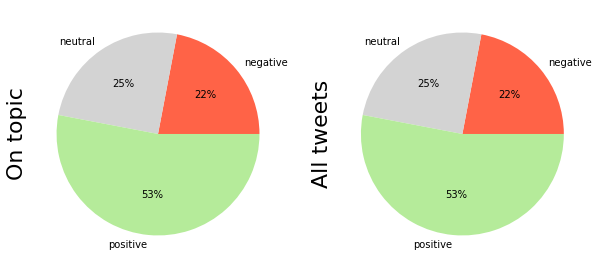

<Figure size 720x360 with 0 Axes>

In [762]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plt.figure(figsize=(10,5))


def label_function(val):
    return f'{val:.0f}%'

data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax1)
data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax2)
ax1.set_ylabel('On topic', size=22)
ax2.set_ylabel('All tweets', size=22)
plt.tight_layout()
plt.show()

In [862]:
today = datetime.now()
limit_date = today + relativedelta(days=-7)
today_time = today.timestamp()
limit_time = limit_date.timestamp()


#params
params=dict(q=query)
tweet_params=dict(q=query, filters= f"timestamp > {limit_time}", limit=100000)
tweet_params_without_query = dict(q="", filters= f"timestamp > {limit_time}")

headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}


#Data from News
lexai_url_news = "http://35.223.18.2/indexes/twitter_press/search"
news = requests.get(lexai_url_news,params=tweet_params,headers=headers).json()

#Data from Politicians
lexai_url_politicians = "http://35.223.18.2/indexes/twitter_politicians/search"
politicians = requests.get(lexai_url_politicians,params=tweet_params,headers=headers).json()

#Data from General
lexai_url_general = f"http://35.223.18.2/indexes/twitter_query/search/"
full_data_general = requests.get(lexai_url_general,params=tweet_params_without_query,headers=headers).json()
query_data_general = requests.get(lexai_url_general,params=tweet_params,headers=headers).json()




general_df = pd.DataFrame(query_data_general["hits"]) 
news_df = pd.DataFrame(news["hits"]) 
politicians_df = pd.DataFrame(politicians["hits"]) 

In [863]:
hashtags=[]
for i in general_df['hashtags']:
    if i !='':
        for j in i.lower().split(', '):
            hashtags.append(j)
for i in news_df['hashtags']:
    if i !='':
        for j in i.lower().split(', '):
            hashtags.append(j)
for i in politicians_df['hashtags']:
    if i !='':
        for j in i.lower().split(', '):
            hashtags.append(j)

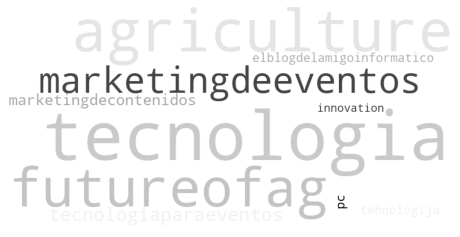

In [866]:

            
text=' '.join(item for item in hashtags)


# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(8, 16))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Import package
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add(query)
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=1, background_color='white', colormap='gray', mode='RGB', collocations=False, stopwords = STOPWORDS, max_words=10).generate(text)
# Plot
plot_cloud(wordcloud)


In [834]:
today = datetime.now()
limit_date = today + relativedelta(days=-7)
today_time = today.timestamp()
limit_time = limit_date.timestamp()


#params
params=dict(q=query)
tweet_params=dict(q=query, filters= f"timestamp > {limit_time}")
tweet_params_without_query = dict(q="", filters= f"timestamp > {limit_time}")

headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}


#Data from News
lexai_url_news = "http://35.223.18.2/indexes/twitter_press/search"
news = requests.get(lexai_url_news,params=tweet_params,headers=headers).json()

#Data from Politicians
lexai_url_politicians = "http://35.223.18.2/indexes/twitter_politicians/search"
politicians = requests.get(lexai_url_politicians,params=tweet_params,headers=headers).json()

#Data from General
lexai_url_general = f"http://35.223.18.2/indexes/twitter_query/search/"
full_data_general = requests.get(lexai_url_general,params=tweet_params_without_query,headers=headers).json()
query_data_general = requests.get(lexai_url_general,params=tweet_params,headers=headers).json()


In [836]:
    '''
    ## Twitter User locations'''
    
    data_df=pd.DataFrame(query_data_general['hits'])
    data_df = data_df.sort_values(by=['timestamp'])
    data_dict = data_df.to_dict('records')   #creates dictionary for further use
    df_europe = pd.read_csv('list_cities3.csv', delimiter= ';')
    list_cities = list(df_europe['city'])
    list_countries = list(df_europe['country'])
   
    ####### sorting by countries #######

    def get_country(city):
        
        #translates city-name to country name
        
        country = df_europe.loc[df_europe['city'] == city, 'country'].iloc[0]
        return country


    def region_lat(region):
        geolocator = Nominatim(user_agent='myapplication')
        try:
            location = geolocator.geocode(region)
            latitude = location[1][0]
            longitude = location[1][1]
        except:
            latitude = 'NaN'
            longitude = 'NaN'
            
        return latitude


    def region_lon(region):
        geolocator = Nominatim(user_agent='myapplication')
        try:
            location = geolocator.geocode(region)
            latitude = location[1][0]
            longitude = location[1][1]
        except:
            latitude = 'NaN'
            longitude = 'NaN'
            
        return longitude


    def count_countries(tweets):
            
        country_counts = {
        
        'country': [],
        'tweets':[],
        'likes': [],
        'retweets': [],
        'sentiment': []
        }
        
        
        for tweet in tweets:
            if ',' in tweet['user_loc']:
                list_loc = tweet['user_loc'].split(',')
                if list_loc[1] in list_countries:
                    country_counts['country'].append(list_loc[1])
                    country_counts['likes'].append(tweet['favorite_count'])
                    country_counts['tweets'].append(1)
                    country_counts['retweets'].append(tweet['retweet_count'])
                    country_counts['sentiment'].append(tweet['compound_score'])
                    
                if list_loc[0] in list_cities:
                    country_counts['country'].append(get_country(list_loc[0])) #translates city to country
                    country_counts['likes'].append(tweet['favorite_count'])
                    country_counts['tweets'].append(1)
                    country_counts['retweets'].append(tweet['retweet_count'])
                    country_counts['sentiment'].append(tweet['compound_score'])

                
                
            elif tweet['user_loc'] in list_cities:
                country_counts['country'].append(get_country(tweet['user_loc']))
                country_counts['likes'].append(tweet['favorite_count'])
                country_counts['tweets'].append(1)
                country_counts['retweets'].append(tweet['retweet_count'])
                country_counts['sentiment'].append(tweet['compound_score'])
                
            elif tweet['user_loc'] in list_countries:
                country_counts['country'].append(tweet['user_loc'])
                country_counts['likes'].append(tweet['favorite_count'])
                country_counts['tweets'].append(1)
                country_counts['retweets'].append(tweet['retweet_count'])
                country_counts['sentiment'].append(tweet['compound_score'])
                
        return country_counts



    country_counts = count_countries(data_dict)
    df_country_counts = pd.DataFrame(country_counts)

    df_country_counts = df_country_counts.dropna()
    df_country_counts = df_country_counts.groupby(by="country", as_index=False).sum()

    df_country_counts['lat'] = df_country_counts['country'].apply(region_lat)
    df_country_counts['lon'] = df_country_counts['country'].apply(region_lon)
    df_country_counts["radius"] = df_country_counts["retweets"].apply(lambda likes: math.sqrt(likes)*1000 + 10000)

    df_country_counts.to_csv('country_counts.csv')

    ######streamlit part#####
    
    st.title('Twitter User locations')

    #map_tweets = pd.read_csv('region_count.csv')

    map_tweets_loc = pd.read_csv('country_counts.csv')

    st.pydeck_chart(pdk.Deck(
    map_style='mapbox://styles/mapbox/light-v9',
    initial_view_state=pdk.ViewState(
        latitude=52.520,
        longitude=-13.404,
        zoom=5,
        pitch=50,
    ),
    layers = [pdk.Layer(
            'ScatterplotLayer',
            data=map_tweets_loc,
            get_position='[lon, lat]',
            get_color='[200, 30, 0, 160]',
            get_radius= 'radius',
        ),
        ],
    ))

FileNotFoundError: [Errno 2] No such file or directory: 'list_cities3.csv'